In [1]:
import csv

import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42

# Specify each path

In [2]:
dataset = '/content/keypoint.csv'
model_save_path = '/content/keypoint_classifier.hdf5'
tflite_save_path = '/content/keypoint_classifier.tflite'

# Set number of classes

In [4]:
NUM_CLASSES = 8

# Dataset reading

In [5]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (21 * 2) + 1)))

In [6]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

# Model building

In [8]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((21 * 2, )),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

In [9]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout (Dropout)           (None, 42)                0         
                                                                 
 dense (Dense)               (None, 20)                860       
                                                                 
 dropout_1 (Dropout)         (None, 20)                0         
                                                                 
 dense_1 (Dense)             (None, 10)                210       
                                                                 
 dense_2 (Dense)             (None, 8)                 88        
                                                                 
Total params: 1158 (4.52 KB)
Trainable params: 1158 (4.52 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [10]:
# Model checkpoint callback
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)
# Callback for early stopping
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

In [11]:
# Model compilation
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Model training

In [12]:
model.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/1000
1/7 [===>..........................] - ETA: 18s - loss: 2.5776 - accuracy: 0.1172
Epoch 1: saving model to /content/keypoint_classifier.hdf5
7/7 [==============================] - 3s 43ms/step - loss: 2.4846 - accuracy: 0.0960 - val_loss: 2.2094 - val_accuracy: 0.0946
Epoch 2/1000
1/7 [===>..........................] - ETA: 0s - loss: 2.4435 - accuracy: 0.0859
Epoch 2: saving model to /content/keypoint_classifier.hdf5
7/7 [==============================] - 0s 11ms/step - loss: 2.3713 - accuracy: 0.0814 - val_loss: 2.1284 - val_accuracy: 0.0946
Epoch 3/1000
1/7 [===>..........................] - ETA: 0s - loss: 2.2199 - accuracy: 0.0938
Epoch 3: saving model to /content/keypoint_classifier.hdf5
7/7 [==============================] - 0s 11ms/step - loss: 2.2188 - accuracy: 0.1186 - val_loss: 2.0764 - val_accuracy: 0.1284
Epoch 4/1000
1/7 [===>..........................] - ETA: 0s - loss: 2.1999 - accuracy: 0.1250

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Epoch 4: saving model to /content/keypoint_classifier.hdf5
7/7 [==============================] - 0s 13ms/step - loss: 2.1558 - accuracy: 0.1266 - val_loss: 2.0396 - val_accuracy: 0.2196
Epoch 5/1000
1/7 [===>..........................] - ETA: 0s - loss: 2.1130 - accuracy: 0.1797
Epoch 5: saving model to /content/keypoint_classifier.hdf5
7/7 [==============================] - 0s 19ms/step - loss: 2.1057 - accuracy: 0.1525 - val_loss: 2.0171 - val_accuracy: 0.2669
Epoch 6/1000
1/7 [===>..........................] - ETA: 0s - loss: 2.0776 - accuracy: 0.1797
Epoch 6: saving model to /content/keypoint_classifier.hdf5
7/7 [==============================] - 0s 16ms/step - loss: 2.0738 - accuracy: 0.1797 - val_loss: 2.0008 - val_accuracy: 0.2601
Epoch 7/1000
1/7 [===>..........................] - ETA: 0s - loss: 2.0871 - accuracy: 0.1484
Epoch 7: saving model to /content/keypoint_classifier.hdf5
7/7 [==============================] - 0s 18ms/step - loss: 2.0372 - accuracy: 0.1819 - val_loss:

In [13]:
# Model evaluation
val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=128)

3/3 [==============================] - 0s 5ms/step - loss: 0.1761 - accuracy: 0.9764


In [16]:
# Loading the saved model
model = tf.keras.models.load_model(model_save_path)

In [17]:
# Inference test
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

1/1 [==============================] - 0s 50ms/step
[1.9072722e-05 1.8983239e-09 6.8554293e-08 7.5635353e-14 1.3363724e-06
 8.7288618e-01 1.2709282e-01 5.5691078e-07]
5


# Confusion matrix

10/10 [==============================] - 0s 5ms/step


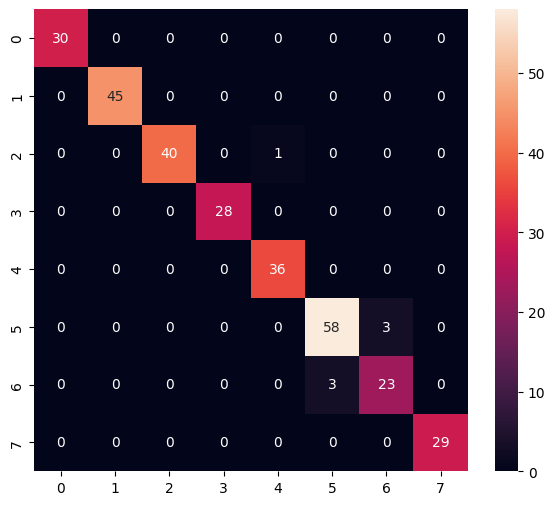

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        30
           1       1.00      1.00      1.00        45
           2       1.00      0.98      0.99        41
           3       1.00      1.00      1.00        28
           4       0.97      1.00      0.99        36
           5       0.95      0.95      0.95        61
           6       0.88      0.88      0.88        26
           7       1.00      1.00      1.00        29

    accuracy                           0.98       296
   macro avg       0.98      0.98      0.98       296
weighted avg       0.98      0.98      0.98       296



In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)

    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)

    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()

    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

# Convert to model for Tensorflow-Lite

In [19]:
# Save as a model dedicated to inference
model.save(model_save_path, include_optimizer=False)

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [20]:
# Transform model (quantization)

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

6720

# Inference test

In [21]:
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

In [22]:
# Get I / O tensor
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [23]:
interpreter.set_tensor(input_details[0]['index'], np.array([X_test[0]]))

In [24]:
%%time
# Inference implementation
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

CPU times: user 0 ns, sys: 514 µs, total: 514 µs
Wall time: 438 µs


In [25]:
print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))

[1.9072710e-05 1.8983171e-09 6.8554314e-08 7.5635245e-14 1.3363714e-06
 8.7288642e-01 1.2709260e-01 5.5690941e-07]
5
